# Zadání

Systém dvou hvězd hlavní posloupnosti s oběžnou drahou v rovině kolmé k pozorovateli je pozorován relativně k primární složce. Ta se tedy nachází v ohnisku oběžné dráhy sekundární složky. Hlavní poloosa $~$ této dráhy je pozorována pod úhlem $\alpha = 4.5"$ a vedlejší poloosa $b$ pod úhlem $\beta = 3.5"$. Relativní magnituda primární složky je $M_{r1} = 3.9$ a sekundární složky $M_{r2} = 5.3$. Sekundární složka urazí za 11 let trajektorii vyznačenou na obrázku v *zadani.pdf*.

Cílem je spočítat (i) oběžnou periodu soustavy $T$, (ii) vzdálenost soustavy $d$, (iii) absolutní magnitudu $M$ každé ze složek a (iv) hmotnost $m$ každé ze složek za pomocí metody dynamické paralaxy.

# Výsledek

*Tabulka 1: Vypracované otázky ze zadání:*

| # | Veličina | Primární složka | Sekundární složka |
| --- | --- | --- | --- |
| i | Oběžná perioda $T$ [rok] | 95.6 | 95.6 |
| ii | Vzdálenost od pozorovatele $d$ [pc] | 5.3 | 5.3 |
| iii | Absolutní magnituda $M$ | 5.27 | 6.67 |
| iv | Hmotnost $m$ [m Slunce] | 0.89 | 0.62 |

# Postup vypracování

Seminární práce byla vypracována v programovacím jazyce *Python* s využitím software *Jupyter Notebook*. Ten umožňuje zdrojový kód rozdělit do buněk, jež lze spouštět nezávisle na sobě a&nbsp;dokumentovat je ve značkovacím jazyce *Markdown* a *LaTeX*. Jupyter Notebook je přiložen pod názvem *sem.ipynb* (ten identický je ale i vyexportován v PDF jako tento soubor). Surový zdrojový kód pak v souboru *sem.py*.

*Tabulka 2: Přiložené soubory a jejich popis:*

| Přiložený soubor | Popis |
| --- | --- |
| sem.pdf | Text práce a dokumentace zdrojového kódu |
| sem.ipynb | Jupyter Notebook se zdrojovým kódem |
| sem.py | Surový zdrojový kód |
| zadani.pdf | Původní zadání práce |

## Vstupní údaje

Ze všeho nejdřív si do proměnných uložíme vstupní údaje ze zadání jakožto i všechny potřebné fyzikální a matematické konstanty.

In [1]:
import matplotlib.pyplot as plt
from math import pi, sqrt, acos, log, tan

G = 6.6742e-11  # Gravitační konstanta [m^3/s^2/kg]
m_s = 1.989e30  # Hmotnost Slunce [kg]
M_s = 4.83  # Absolutní magnituda Slunce
lum_s = 3.846e26   # Zářivý výkon Slunce [W]
PC_TO_AU = 206265  # Převod parsecu na au
RAD_TO_S = 206265  # Převod radiánu na vteřiny
AU_TO_M = 1.496e+11  # Převod au na metry
Y_TO_S = 31556926  # Převod roku na sekundy

M_r1 = 3.9  # Relativní magnituda primární složky
M_r2 = 5.3  # Relativní magnituda sekundární složky
alpha = 4.5 / RAD_TO_S  # Velká poloosy dráhy [rad]
beta = 3.4 / RAD_TO_S  # Malá poloosy dráhy [rad]
T_1 = 11 * Y_TO_S  # Část periody sekundární složky [s]

## Výpočet oběžné periody soustavy

Nejprve spočítejme absolutní excentricitu dráhy $h$ z hlavní a vedlejší poloosy.

$$
h = \sqrt{\alpha^{2} - \beta^{2}}
$$

In [2]:
h = sqrt(alpha**2 - beta**2)  # Absolutní excentricita dráhy [rad]
h

1.4291715000590186e-05

Poté využijme skutečnosti, že sekundární složce trvalo 11 let, než její průvodič opsal plochu $S_1$ danou vztahem mezi absolutní excentricitou $h$ a velkou poloosou $a$.

$$
S_1 = \alpha\beta\left(\arccos\frac{h}{\alpha} - \frac{h}{\alpha^{2}}\sqrt{\alpha^{2} - h^{2}}\right)
$$

In [3]:
S_1 = alpha * beta * (acos(h / alpha) - (h  / alpha**2) * sqrt(alpha**2 - h**2))  # Obsah plochy opsané průvodičem sekundární složky za 11 let [rad^2]
S_1

1.300192002539296e-10

Následně můžeme spočítat plochu celé oběžné dráhy $S$.

$$
S = \pi\alpha\beta
$$

In [4]:
S = pi * alpha * beta  # Plocha oběžné dráhy sekundární složky [rad^2]
S

1.1297704760396395e-09

Protože z 2. Keplerova zákona víme, že plochy opsané průvodičem tělesa jsou za stejný čas stejně velké, přes trojčlenku vypočítáme oběžnou periodu soustavy.

$$
T = \frac{S}{S_1}T_1
$$

In [5]:
T = S / S_1 * T_1  # Oběžná perioda soustavy [s]
T / Y_TO_S

95.5818464670216

Oběžná perioda soustavy je **T = 95.6 let**.

## Výpočet vzdálenosti soustavy

Nejdříve předpokládejme, že každá složka má hmotnost jednoho Slunce. Celá soustava bude mít tedy hmotnost dvou Sluncí.

In [6]:
m_1 = m_s  # Předpokládaná hmotnost primární složky [kg]
m_2 = m_s  # Předpokládaná hmotnost sekundární složky [kg]

Z 3. Keplerova zákona pak můžeme vypočítat velkou poloosu $a$.

$$
\frac{a^3}{T^2} = \frac{G(m_1 + m_2)}{4\pi^2} \implies a = \sqrt[3]{\frac{T^2G(m_1 + m_2)}{4\pi^2}}
$$

In [7]:
calc_semi_major_axis = lambda: (T**2 * G * (m_1 + m_2) / (4 * pi**2))**(1/3)
a = calc_semi_major_axis()  # Velká poloosa oběžné dráhy sekundární složky [m]
a / AU_TO_M

26.340048139775057

To znamená, že pozorujeme vzdálenost 26.3 au pod úhlem 4.5". Goniometrickým vztahem můžeme dojít k výpočtu vzdálenosti $d$ od pozorovatele.

$$
d = \frac{a}{\tan{\alpha}}
$$

In [8]:
calc_distance = lambda: a / tan(alpha)
d = calc_distance()  # Vzdálenost soustavy od pozorovatele [m]
d / AU_TO_M / PC_TO_AU

5.853344030132464

Vzdálenost soustavy od pozorovatele je **d = 5.9 pc**.

## Výpočet absolutní magnitudy

Pro výpočet absolutní magnitudy $M$ každé ze složek využijeme vztahu mezi absolutní magnitudou, relativní magnitudou $M_r$ a vzdáleností od pozorovatele $d$.

$$
M = M_r + 5 - 5\log{d}
$$

In [9]:
rel_mag_to_mag = lambda M_r: M_r + 5 - 5 * log(d / PC_TO_AU / AU_TO_M, 10)
M_1, M_2 = rel_mag_to_mag(M_r1), rel_mag_to_mag(M_r2)  # abs. magnituda složek
M_1, M_2

(5.062979747447844, 6.462979747447845)

Absolutní magnituda primární složky je **M = 5.1**, sekudární složky **M = 6.5**.

## Výpočet hmotnosti

Nejdříve musíme zjistit zářivý výkon obou složek s využitím Pogsonovy rovnice.

$$
M - M_{s} = -2.5\log{\frac{L}{L_s}} \implies L = L_s10^{-\frac{M - M_{s}}{2.5}}
$$

In [10]:
mag_to_lum = lambda M: lum_s * 10**(-(M - M_s) / 2.5)
lum_1, lum_2 = mag_to_lum(M_1), mag_to_lum(M_2)  # svítivost složek [W]
lum_1 / lum_s, lum_2 / lum_s

(0.8068784211605293, 0.22223277076645107)

Protože jsou obě hvězdy hlavní posloupnosti, můžeme pro odhad jejich hmotnosti využít vztah

$$
L \sim m^{3.5} \implies m \sim \sqrt[3.5]{L}
$$

In [11]:
lum_to_mass = lambda lum: m_s * (lum / lum_s)**(1/3.5)
m_1, m_2 = lum_to_mass(lum_1), lum_to_mass(lum_2)  # hmotnosti složek [kg]
m_1 / m_s, m_2 / m_s

(0.9405323614061032, 0.6506894167722643)

Hmotnost primární složky je **m1 = 0.94**, té sekundární pak **m2 = 0.65** relativně vůči Slunci.

## Iterace

Dynamická paralaxa je iteračním algoritmem - zméřené kroky opakujeme stále dokola, přičemž vypočítané veličiny by měly konvergovat k nějaké hodnotě. My budeme kroky opakovat až do doby, kdy se veličiny budou lišit o méně než 1 %. Pro možnost zobrazení grafu s konvergencí všech měřených veličin budeme ukládat všechny hodnoty každé iterace do proměnné `H` (history).

In [12]:
H = { "M_1": [M_1], "M_2": [M_2], "m_1": [m_1], "m_2": [m_2], "a": [a], "d": [d] }
is_converged = False
is_ok = lambda val1, val2: abs(val1 / val2 - 1) < 0.01

while not is_converged:
	a = calc_semi_major_axis()
	d = calc_distance()
	M_1, M_2 = rel_mag_to_mag(M_r1), rel_mag_to_mag(M_r2)
	lum_1, lum_2 = mag_to_lum(M_1), mag_to_lum(M_2)
	m_1, m_2 = lum_to_mass(lum_1), lum_to_mass(lum_2)

	is_converged = is_ok(H["m_1"][-1], m_1) and is_ok(H["m_2"][-1], m_2) and is_ok(H["M_1"][-1], M_1) and is_ok(H["M_2"][-1], M_2) and is_ok(H["d"][-1], d)

	H["a"].append(a), H["d"].append(d), H["m_1"].append(m_1)
	H["m_2"].append(m_2), H["M_1"].append(M_1), H["M_2"].append(M_2)

Po 4 iteracích jsme došli k výsledku.

In [13]:
a / AU_TO_M

23.988947235818326

Velká poloosa oběžné dráhy je **a = 24 au**.

In [14]:
d / AU_TO_M / PC_TO_AU

5.330877162669417

Vzdálenost soustavy od pozorovatele je **d = 5.3 pc**.

In [15]:
M_1, M_2

(5.2660066231934834, 6.666006623193484)

Absolutní magnituda obou složek je **M1 = 5.2** a **M2 = 6.7**.

In [16]:
m_1 / m_s, m_2 / m_s

(0.8916012560721098, 0.616837362660911)

Hmotnost složek je **m1 = 0.89** a **m2 = 0.62** relativně vůči Slunci. Jedná se tak o hvězdy o něco menší, než je Slunce.

*Graf 1: Konvergence veličin v jednotlivých iteracích:*

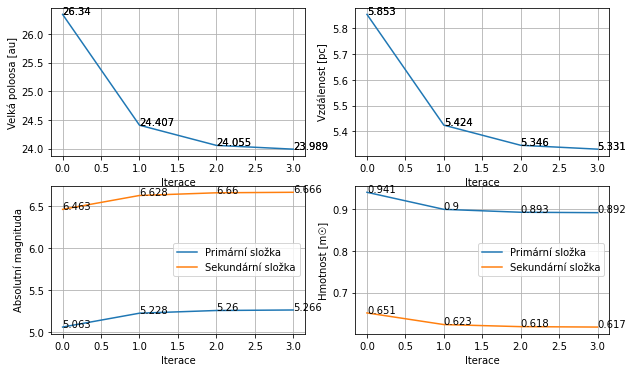

In [17]:
rescale = lambda vals, x: list(map(lambda val: round(val * x, 3), vals))

def plot(ax, name, label, both=False, scale=1):
	name1, name2 = (f"{name}_1", f"{name}_2") if both else (name, name)
	vals1, vals2 = rescale(H[name1], scale), rescale(H[name2], scale)
	ax.plot(vals1)
	ax.set_xlabel("Iterace"), ax.set_ylabel(label), ax.grid()

	for i in range(len(vals1)):
		ax.text(i, vals1[i], vals1[i]), ax.text(i, vals2[i], vals2[i])

	if both:
		ax.plot(vals2)
		ax.legend(["Primární složka", "Sekundární složka"])

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
plot(axs[0, 0], "a", "Velká poloosa [au]", scale=1/AU_TO_M)
plot(axs[0, 1], "d", "Vzdálenost [pc]", scale=1/PC_TO_AU/AU_TO_M)
plot(axs[1, 0], "M", "Absolutní magnituda", both=True)
plot(axs[1, 1], "m", "Hmotnost [m☉]", both=True, scale=1/m_s)